In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import time

In [2]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Features (X) and target (y)
X = df.drop("target", axis=1)  # Drop the target column
y = df["target"]  # Target column

# Display dataset information
print("Dataset Shape:", df.shape)
print("Feature Names:", data.feature_names)
df.head()

Dataset Shape: (569, 31)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train Decision Tree
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_time = time.time() - start_time

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"ROC AUC Score: {roc_auc_dt:.2f}")
print(f"Training Time: {dt_time:.4f} seconds")

Decision Tree Performance:
Accuracy: 0.95
ROC AUC Score: 0.94
Training Time: 0.0092 seconds


In [5]:
# Train Random Forest
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_time = time.time() - start_time

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"ROC AUC Score: {roc_auc_rf:.2f}")
print(f"Training Time: {rf_time:.4f} seconds")

Random Forest Performance:
Accuracy: 0.96
ROC AUC Score: 1.00
Training Time: 0.2180 seconds


In [6]:
# Train Extra Trees
start_time = time.time()
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
et_time = time.time() - start_time

# Predict and evaluate
y_pred_et = et_model.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
roc_auc_et = roc_auc_score(y_test, et_model.predict_proba(X_test)[:, 1])

print("Extra Trees Performance:")
print(f"Accuracy: {accuracy_et:.2f}")
print(f"ROC AUC Score: {roc_auc_et:.2f}")
print(f"Training Time: {et_time:.4f} seconds")

Extra Trees Performance:
Accuracy: 0.96
ROC AUC Score: 1.00
Training Time: 0.1222 seconds


In [7]:
# Create a comparison table
comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Extra Trees"],
    "Accuracy": [accuracy_dt, accuracy_rf, accuracy_et],
    "ROC AUC": [roc_auc_dt, roc_auc_rf, roc_auc_et],
    "Training Time (s)": [dt_time, rf_time, et_time]
})
print(comparison)

           Model  Accuracy   ROC AUC  Training Time (s)
0  Decision Tree  0.947368  0.943990           0.009156
1  Random Forest  0.964912  0.995251           0.217982
2    Extra Trees  0.964912  0.998690           0.122235


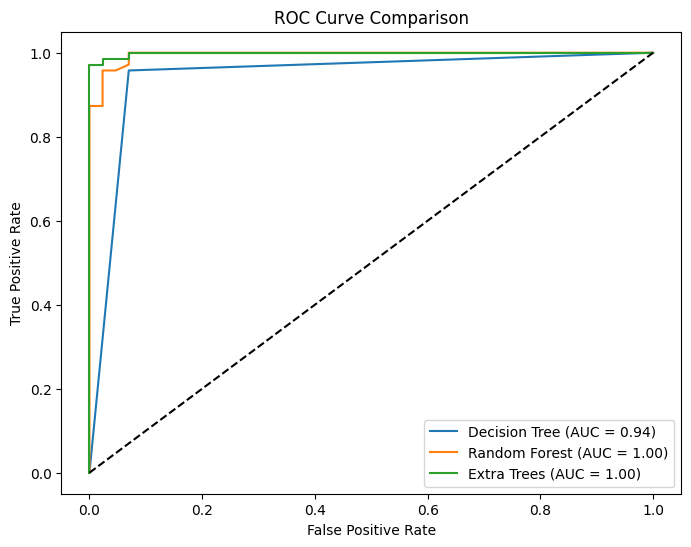

In [8]:
# ROC Curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_et, tpr_et, _ = roc_curve(y_test, et_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_et, tpr_et, label=f"Extra Trees (AUC = {roc_auc_et:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fractal dimension    0.005210


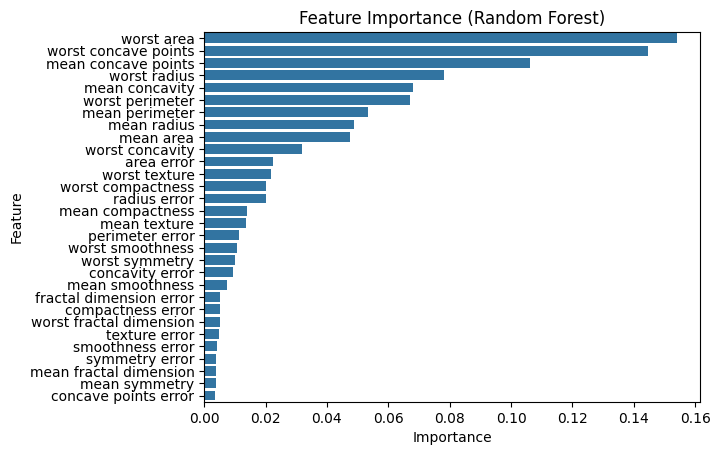

In [9]:
# Feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

# Visualize feature importance
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()

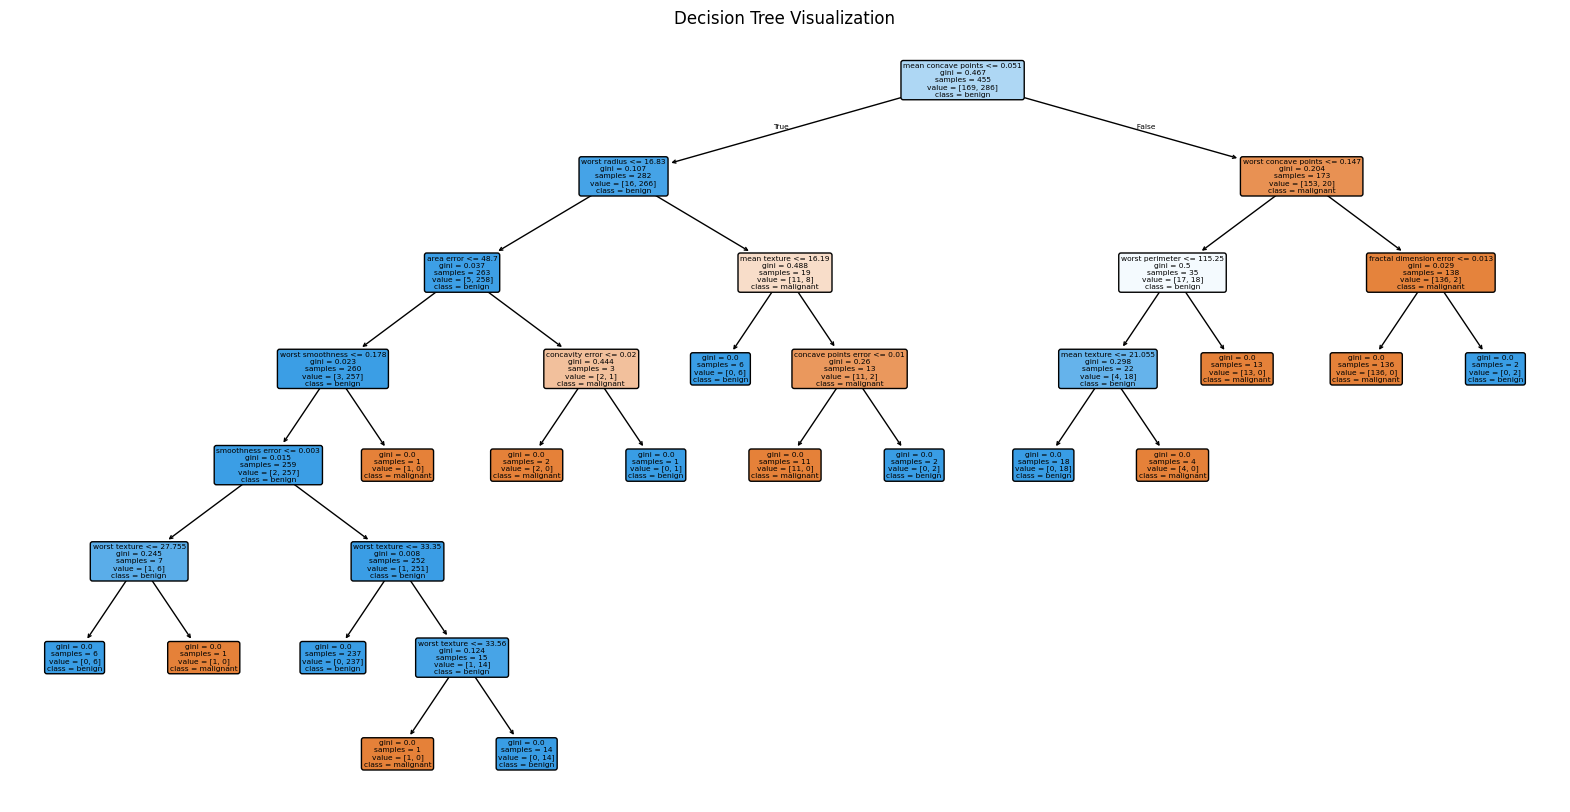

In [11]:
from sklearn.tree import plot_tree

# visualize the decision tree parameters 
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [12]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_row(row, self.tree) for row in X])

    def _build_tree(self, X, y, depth):
        # Stop if max depth is reached or all labels are the same
        if depth >= self.max_depth or len(set(y)) == 1:
            return {"label": self._majority_class(y)}

        # Find the best split
        feature, threshold = self._best_split(X, y)
        if feature is None:
            return {"label": self._majority_class(y)}

        # Split the data
        left_indices = X[:, feature] <= threshold
        right_indices = X[:, feature] > threshold

        # Recursively build the tree
        return {
            "feature": feature,
            "threshold": threshold,
            "left": self._build_tree(X[left_indices], y[left_indices], depth + 1),
            "right": self._build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def _best_split(self, X, y):
        best_feature, best_threshold, best_gini = None, None, float("inf")
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gini = self._gini_index(X[:, feature], y, threshold)
                if gini < best_gini:
                    best_feature, best_threshold, best_gini = feature, threshold, gini
        return best_feature, best_threshold

    def _gini_index(self, feature_column, y, threshold):
        left_indices = feature_column <= threshold
        right_indices = feature_column > threshold

        left_gini = self._gini(y[left_indices])
        right_gini = self._gini(y[right_indices])

        left_weight = len(y[left_indices]) / len(y)
        right_weight = len(y[right_indices]) / len(y)

        return left_weight * left_gini + right_weight * right_gini

    def _gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _majority_class(self, y):
        classes, counts = np.unique(y, return_counts=True)
        return classes[np.argmax(counts)]

    def _predict_row(self, row, tree):
        if "label" in tree:
            return tree["label"]
        if row[tree["feature"]] <= tree["threshold"]:
            return self._predict_row(row, tree["left"])
        else:
            return self._predict_row(row, tree["right"])

In [13]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Sigmoid activation
            y_predicted = self._sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt = DecisionTree(max_depth=3)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Logistic Regression
lr = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Decision Tree Accuracy: 0.9385964912280702
Logistic Regression Accuracy: 0.9473684210526315


/tmp/ipykernel_110195/3600634024.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
